## [作業重點]
清楚了解 L1, L2 的意義與差異為何，並了解 LASSO 與 Ridge 之間的差異與使用情境

## 作業

請閱讀相關文獻，並回答下列問題

[脊回歸 (Ridge Regression)](https://blog.csdn.net/daunxx/article/details/51578787)
[Linear, Ridge, Lasso Regression 本質區別](https://www.zhihu.com/question/38121173)

1. LASSO 回歸可以被用來作為 Feature selection 的工具，請了解 LASSO 模型為什麼可用來作 Feature selection
2. 當自變數 (X) 存在高度共線性時，Ridge Regression 可以處理這樣的問題嗎?


Ans:
1. 因透過Lasso回歸後的模型，會將大部分的的參數變成0，剩下的就是代表有用的特徵，因此可以拿來做特徵選擇。

2. 當使用最小二乘法计算線性回歸模型參數的时候，如果數據集合矩陣（也叫做側記矩阵(design matrix)）X，存在多重共線性，那最小二乘法對输入變量中的雜訊非常的敏感，其解會極為不穩定。為了解决這个问题，就有了脊回歸（Ridge Regression ）。

## 脊回歸簡單的代碼示例
顯示了不同的alpha對模型參數w的影響程度。
* alpha越大，則w的數值上越小
* alpha越小，则w的數值上越大

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
# 這裡設計矩陣X是一個希爾伯特矩陣（Hilbert matrix）
# 其元素A（i, j）= 1 / (i + j -1), i和j分别為其行和列
# 希爾伯特矩陣是一種數學變換矩陣，正定 ，且高度病態
# 即，任何一个元素發生一點變動，整個矩陣的行列式的值和逆矩陣都會發生巨大變化

# 這裡矩陣是一個10x5的矩陣，即有10個樣本，5个變量
X = 1. / (np.arange(1, 6) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

print('設計矩陣為：')
print(X)

設計矩陣為：
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.16666667 0.14285714 0.125      0.11111111 0.1       ]
 [0.14285714 0.125      0.11111111 0.1        0.09090909]
 [0.125      0.11111111 0.1        0.09090909 0.08333333]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308]
 [0.1        0.09090909 0.08333333 0.07692308 0.07142857]]


In [7]:
# alpha 取值為10的-10 到 10的-2 之間的連續的200個值
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
print('alpha的值为：')
print(alphas.shape)

alpha的值为：
(200,)


In [9]:
# 初始化一個Ridge Regression
clf = linear_model.Ridge(fit_intercept=False)

# 參數矩阵，即每一個alpha對於的參數所组成的矩陣
coefs = []

# 根據不同的alpha訓練出不同的模型參數
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


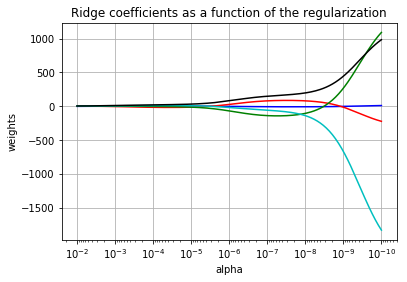

In [10]:
# 獲得繪圖
ax = plt.gca()
# 參數中每一個维度使用一個颜色表示
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k'])

# 繪製alpha和對應的参数之間的關係圖
ax.plot(alphas, coefs)
ax.set_xscale('log')    #x軸使用對數表示
ax.set_xlim(ax.get_xlim()[::-1])  # 將x軸反轉，便於顯示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()